<a href="https://colab.research.google.com/github/smiling621/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
#here we load the dataset
df = pd.read_csv("/content/customer_churn.csv")

In [3]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [4]:
df.shape

(900, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [8]:
#for missing value
df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [9]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [10]:
#converting categorical variables into numerical
categorical_columns = ['Names', 'Onboard_date', 'Location', 'Company']
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
data_encoded.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,Names_Aaron Meyer,Names_Aaron West,Names_Abigail Gonzalez,Names_Abigail Jennings,...,"Company_Yates, Martinez and Cox",Company_Young and Sons,"Company_Young, Porter and Hill",Company_Young-Dunn,Company_Young-Newman,Company_Yu-Murillo,Company_Zamora-Cherry,Company_Zhang-Brown,Company_Zimmerman Group,"Company_Zuniga, Clark and Shaffer"
0,42.0,11066.80,0,7.22,8.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,41.0,11916.22,0,6.50,11.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,38.0,12884.75,0,6.67,12.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,42.0,8010.76,0,6.71,10.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,37.0,9191.58,0,5.56,9.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#Splitting the data into X and Y
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']


In [13]:
#Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#buildinfg the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
#evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8611111111111112
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       148
           1       0.73      0.34      0.47        32

    accuracy                           0.86       180
   macro avg       0.80      0.66      0.69       180
weighted avg       0.85      0.86      0.84       180



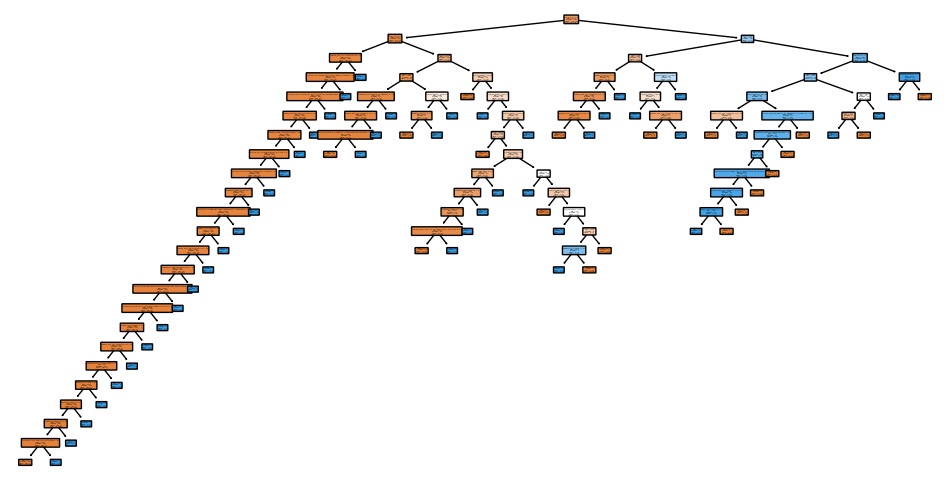

In [20]:
#visualizing the decision tree
plt.figure(figsize=(12, 6))
tree.plot_tree(model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True,rounded=True)
plt.show()